In [2]:
from leicaexperiment import Experiment
e = Experiment('data/experiment--2015_04_29_12_46_29/')

In [3]:
from skimage.io import imread, imshow, imsave

In [4]:
img1 = imread(e.image(0,0,0,0))
img2 = imread(e.image(0,0,1,0))

In [5]:
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import resize
from matplotlib.pyplot import figure, subplot, plot, yticks, xticks, legend
from math import ceil

def imshow_downscale(img):
    "matplotlib is slooooow, showing downscaled images is speedier"
    y,x = img.shape
    # downscale factor
    k = ceil(y//512+0.1)
    imshow(resize(img, (y//k, x//k)))

    # real ticks
    if y > x:
        # less ticks if not square image
        y_step = y//6
        x_step = int(y_step*x/y)
    if x < y:
        y_step = y//6
        x_step = int(y_step*y/x)
    else:
        y_step = y//6
        x_step = x//6

    yticks(range(0,y//k,y_step//k), [str(y) for y in range(0,y,y_step)])
    xticks(range(0,x//k,x_step//k), [str(x) for x in range(0,x,x_step)]);

def side_by_side(*images):
    "view images side by side"
    size = len(images)
    figure(figsize=(size*5,5))
    for i,img in enumerate(images):
        subplot(1, size, i+1)
        imshow_downscale(img)

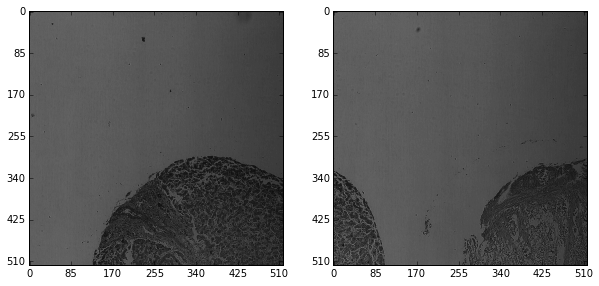

In [8]:
side_by_side(img1, img2)

In [6]:
from skimage.feature import register_translation

In [10]:
register_translation(img1, img2)

(array([  0., -39.]), 0.24095294775932846, 8.8062753056740512e-17)

In [7]:
import numpy as np

def stitch(img1, img2, dy, dx):
    y,x = img1.shape
    yy,xx = img2.shape
    
    if dy >= 0:
        y_pos1 = slice(0, y)
        y_pos2 = slice(dy, yy+dy)
    if dy < 0:
        y_pos1 = slice(-dy, y-dy)
        y_pos2 = slice(0, yy)
    if dx >= 0:
        x_pos1 = slice(0, x)
        x_pos2 = slice(dx, xx+dx)
    if dx < 0:
        x_pos1 = slice(-dx, x-dx)
        x_pos2 = slice(0, xx)
    
    Y = max((y_pos1.stop, y_pos2.stop)) - min((y_pos1.start, y_pos2.start))
    X = max((x_pos1.stop, x_pos2.stop)) - min((x_pos1.start, x_pos2.start))
    
    merged = np.zeros((Y,X), dtype=img1.dtype)
    merged[y_pos1,x_pos1] = img1
    merged[y_pos2,x_pos2] = img2
    
    return merged

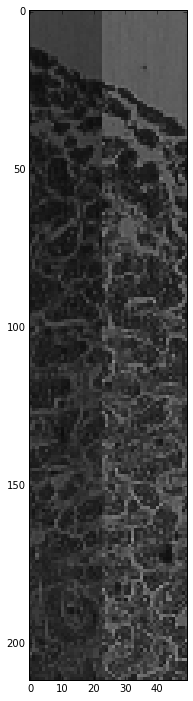

In [20]:
merged = stitch(img1, img2, 0, -39%512)
figure(figsize=(5,12))
imshow(merged[300:, 450:500])

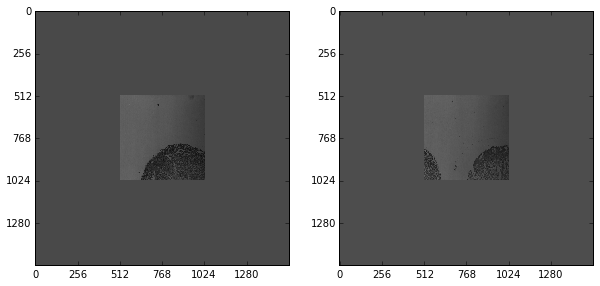

In [85]:
img1 = imread(e.image(0,0,0,0))
img2 = imread(e.image(0,0,1,0))
img1 = np.pad(img1, 512, 'constant', constant_values=int(img1.mean()))
img2 = np.pad(img2, 512, 'constant', constant_values=int(img2.mean()))
side_by_side(img1, img2)

In [88]:
imreg.translation(img1, img2)

(array([ 11, 493]), 0.030219717434332934)

In [68]:
register_translation(img1, img2)

(array([  0., -16.]), 0.08459562653810053, 1.3960569428371428e-17)

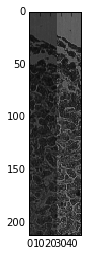

In [89]:
img1 = imread(e.image(0,0,0,0))
img2 = imread(e.image(0,0,1,0))

merged = stitch(img1, img2, 0, -16%512)
imshow(merged[300:,470:520])

In [90]:
import imreg_dft as imreg

In [98]:
imreg.translation(img1, img2, constraints=dict(tx=(-20, 15), ty=(10,10)))

(array([ 11, -19]), 0.03660609716455495)

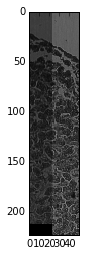

In [82]:
merged = stitch(img1, img2, 11, -19%512)
imshow(merged[300:,470:520])

In [84]:
imsave('merged.png', merged[300:,470:520])